In [ ]:
##pip install mlxtend

In [1]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
## http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/
## refer the above link
df = pd.read_csv(r"C:\Users\k\Downloads\data 5 retail basket\retail_dataset.csv")
df.head()

,0,1,2,3,4,5,6
0,Bread,Wine,Eggs,Meat,Cheese,Pencil,Diaper
1,Bread,Cheese,Meat,Diaper,Wine,Milk,Pencil
2,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
3,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
4,Meat,Pencil,Wine,NaN,NaN,NaN,NaN


In [3]:
df.shape

(315, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       315 non-null    object
 1   1       285 non-null    object
 2   2       245 non-null    object
 3   3       187 non-null    object
 4   4       133 non-null    object
 5   5       71 non-null     object
 6   6       41 non-null     object
dtypes: object(7)
memory usage: 17.4+ KB


In [5]:
records = []
for i in range(1, 315):
    records.append([str(df.values[i, j]) for j in range(0, 7)])

In [6]:
records

[['Bread', 'Cheese', 'Meat', 'Diaper', 'Wine', 'Milk', 'Pencil'],
 ['Cheese', 'Meat', 'Eggs', 'Milk', 'Wine', 'nan', 'nan'],
 ['Cheese', 'Meat', 'Eggs', 'Milk', 'Wine', 'nan', 'nan'],
 ['Meat', 'Pencil', 'Wine', 'nan', 'nan', 'nan', 'nan'],
 ['Eggs', 'Bread', 'Wine', 'Pencil', 'Milk', 'Diaper', 'Bagel'],
 ['Wine', 'Pencil', 'Eggs', 'Cheese', 'nan', 'nan', 'nan'],
 ['Bagel', 'Bread', 'Milk', 'Pencil', 'Diaper', 'nan', 'nan'],
 ['Bread', 'Diaper', 'Cheese', 'Milk', 'Wine', 'Eggs', 'nan'],
 ['Bagel', 'Wine', 'Diaper', 'Meat', 'Pencil', 'Eggs', 'Cheese'],
 ['Cheese', 'Meat', 'Eggs', 'Milk', 'Wine', 'nan', 'nan'],
 ['Bagel', 'Eggs', 'Meat', 'Bread', 'Diaper', 'Wine', 'Milk'],
 ['Bread', 'Diaper', 'Pencil', 'Bagel', 'Meat', 'nan', 'nan'],
 ['Bagel', 'Cheese', 'Milk', 'Meat', 'nan', 'nan', 'nan'],
 ['Bread', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'],
 ['Pencil', 'Diaper', 'Bagel', 'nan', 'nan', 'nan', 'nan'],
 ['Meat', 'Bagel', 'Bread', 'nan', 'nan', 'nan', 'nan'],
 ['Bread', 'Bagel', 'Milk',

In [7]:
te = TransactionEncoder()
te_ary = te.fit(records).transform(records)
df1 = pd.DataFrame(te_ary, columns = te.columns_)
df1.head()

,Bagel,Bread,Cheese,Diaper,Eggs,Meat,Milk,Pencil,Wine,nan
0,False,True,True,True,False,True,True,True,True,False
1,False,False,True,False,True,True,True,False,True,True
2,False,False,True,False,True,True,True,False,True,True
3,False,False,False,False,False,True,False,True,True,True
4,True,True,False,True,True,False,True,True,True,False


In [8]:
frequent_itemsets = apriori(df1, min_support=0.2, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.426752,(Bagel),1
1,0.503185,(Bread),1
2,0.500000,(Cheese),1
3,0.404459,(Diaper),1
4,0.436306,(Eggs),1
5,0.474522,(Meat),1
6,0.503185,(Milk),1
7,0.359873,(Pencil),1
8,0.436306,(Wine),1
9,0.872611,(nan),1


In [9]:
## http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/
## refer the link above
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Bagel),(Bread),0.426752,0.503185,0.280255,0.656716,1.305120,0.065520,1.447245
1,(Bagel),(nan),0.426752,0.872611,0.337580,0.791045,0.906526,-0.034809,0.609645
2,(Bread),(nan),0.503185,0.872611,0.398089,0.791139,0.906634,-0.040996,0.609921
3,(Eggs),(Cheese),0.436306,0.500000,0.296178,0.678832,1.357664,0.078025,1.556818
4,(Meat),(Cheese),0.474522,0.500000,0.321656,0.677852,1.355705,0.084395,1.552083
5,(Cheese),(Meat),0.500000,0.474522,0.321656,0.643312,1.355705,0.084395,1.473214
6,(Cheese),(Milk),0.500000,0.503185,0.305732,0.611465,1.215190,0.054140,1.278689
7,(Milk),(Cheese),0.503185,0.500000,0.305732,0.607595,1.215190,0.054140,1.274194
8,(Wine),(Cheese),0.436306,0.500000,0.267516,0.613139,1.226277,0.049363,1.292453
9,(Cheese),(nan),0.500000,0.872611,0.394904,0.789809,0.905109,-0.041401,0.606061


In [10]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Bagel),(Bread),0.426752,0.503185,0.280255,0.656716,1.305120,0.065520,1.447245
1,(Bread),(Bagel),0.503185,0.426752,0.280255,0.556962,1.305120,0.065520,1.293904
2,(Bagel),(Milk),0.426752,0.503185,0.226115,0.529851,1.052995,0.011380,1.056718
3,(Milk),(Bagel),0.503185,0.426752,0.226115,0.449367,1.052995,0.011380,1.041072
4,(Bread),(Diaper),0.503185,0.404459,0.229299,0.455696,1.126682,0.025782,1.094134
5,(Diaper),(Bread),0.404459,0.503185,0.229299,0.566929,1.126682,0.025782,1.147192
6,(Bread),(Milk),0.503185,0.503185,0.280255,0.556962,1.106874,0.027060,1.121383
7,(Milk),(Bread),0.503185,0.503185,0.280255,0.556962,1.106874,0.027060,1.121383
8,(Bread),(Wine),0.503185,0.436306,0.242038,0.481013,1.102467,0.022496,1.086143
9,(Wine),(Bread),0.436306,0.503185,0.242038,0.554745,1.102467,0.022496,1.115798


In [11]:
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
0,(Bagel),(Bread),0.426752,0.503185,0.280255,0.656716,1.305120,0.065520,1.447245,1
1,(Bread),(Bagel),0.503185,0.426752,0.280255,0.556962,1.305120,0.065520,1.293904,1
2,(Bagel),(Milk),0.426752,0.503185,0.226115,0.529851,1.052995,0.011380,1.056718,1
3,(Milk),(Bagel),0.503185,0.426752,0.226115,0.449367,1.052995,0.011380,1.041072,1
4,(Bread),(Diaper),0.503185,0.404459,0.229299,0.455696,1.126682,0.025782,1.094134,1
5,(Diaper),(Bread),0.404459,0.503185,0.229299,0.566929,1.126682,0.025782,1.147192,1
6,(Bread),(Milk),0.503185,0.503185,0.280255,0.556962,1.106874,0.027060,1.121383,1
7,(Milk),(Bread),0.503185,0.503185,0.280255,0.556962,1.106874,0.027060,1.121383,1
8,(Bread),(Wine),0.503185,0.436306,0.242038,0.481013,1.102467,0.022496,1.086143,1
9,(Wine),(Bread),0.436306,0.503185,0.242038,0.554745,1.102467,0.022496,1.115798,1


In [12]:
rules[ (rules['antecedent_len'] >= 2) &
       (rules['confidence'] > 0.6) &
       (rules['lift'] > 1.0) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
32,"(Bagel, nan)",(Bread),0.337580,0.503185,0.213376,0.632075,1.256150,0.043511,1.350318,2
36,"(Meat, Cheese)",(Eggs),0.321656,0.436306,0.213376,0.663366,1.520416,0.073035,1.674504,2
37,"(Meat, Eggs)",(Cheese),0.264331,0.500000,0.213376,0.807229,1.614458,0.081210,2.593750,2
38,"(Cheese, Eggs)",(Meat),0.296178,0.474522,0.213376,0.720430,1.518222,0.072833,1.879593,2
42,"(nan, Eggs)",(Cheese),0.337580,0.500000,0.219745,0.650943,1.301887,0.050955,1.432432,2
46,"(Meat, Cheese)",(Milk),0.321656,0.503185,0.203822,0.633663,1.259306,0.041969,1.356171,2
47,"(Meat, Milk)",(Cheese),0.245223,0.500000,0.203822,0.831169,1.662338,0.081210,2.961538,2
48,"(Cheese, Milk)",(Meat),0.305732,0.474522,0.203822,0.666667,1.404922,0.058745,1.576433,2
52,"(Meat, nan)",(Cheese),0.369427,0.500000,0.235669,0.637931,1.275862,0.050955,1.380952,2


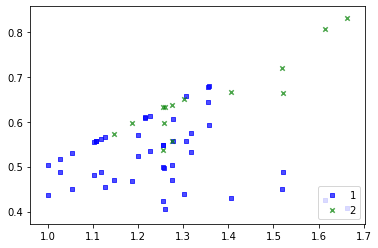

In [13]:
import matplotlib.pyplot as plt
from mlxtend.plotting import category_scatter

fix = category_scatter(x = "lift", y = "confidence", label_col = "antecedent_len", 
                       data=rules, legend_loc= "lower right")